# Import Eppy and Set Work Environment

In this cell we import the EnergyPlus idd file, building idf file, and materials idf file that contains our material library (which we will require later on).

In [ ]:
! pip install eppy

In [1]:
import sys
from eppy import modeleditor
from eppy.modeleditor import IDF
iddfile = r"C:\EnergyPlusV9-5-0\Energy+.idd" #change to your energy+ idd filepath
fname1 = r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\untitled.idf" #change to your idf file path
fname2 = r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\materials.idf" #change to your materials idf filepath
weather_file = r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw" #change to your weather file path


In [2]:
from eppy import modeleditor

In [3]:
IDF.setiddname(iddfile)
idf1 = IDF(fname1, weather_file)
materials = IDF(fname2, weather_file)

In this cell we import other packages required for Data visualization such as numpy and pandas

In [ ]:
! pip install numpy

In [ ]:
! pip install pandas

In [ ]:
! pip install matplotlib

In [ ]:
! pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Run IDF

In [5]:
idf1.run()


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf



# Data Visualization

To visualize the data we need to import esoreader, which reads the eso file that is returned by the E+ simulation

In [ ]:
! pip install esoreader

In [6]:
import esoreader

In [7]:
eso = esoreader.read_from_path(r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\eplusout.eso")

The eso file returns multiple python dictionaries with integer keys as seen above

In [82]:
eso.dd.variables[119]

['Hourly',
 '9467A6 IDEAL LOADS AIR SYSTEM',
 'Zone Ideal Loads Supply Air Sensible Heating Energy',
 'J']

In [9]:
eso.data[218]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

As seen, we have a dictionary that yields the output timestep, building name, and output nme, for each key, and a dictionary that yields each key's respective data. Thus, we can create a dataframe from a dictionary for target keys that we want to visualize or study.

In [10]:
eso.dd.variables.keys()

dict_keys([7, 8, 119, 169, 218, 134, 183])

In [11]:
targets = [7, 8, 119, 169, 218, 134, 183]
results = pd.DataFrame({eso.dd.variables[key][2]: eso.data[key] for key in eso.data.keys() if key in targets})

In [12]:
results

,Zone People Occupant Count,Zone Mean Air Temperature,Zone Ideal Loads Supply Air Sensible Heating Energy,Zone Ideal Loads Supply Air Total Cooling Energy,Zone Thermal Comfort ASHRAE 55 Simple Model Summer or Winter Clothes Not Comfortable Time,DistrictHeating:HVAC,DistrictCooling:HVAC
0,0.0,20.676388,0.000000e+00,0.0,0.0,0.000000e+00,0.0
1,0.0,20.414698,0.000000e+00,0.0,0.0,0.000000e+00,0.0
2,0.0,20.149758,0.000000e+00,0.0,0.0,0.000000e+00,0.0
3,0.0,20.000006,3.078439e+05,0.0,0.0,3.078439e+05,0.0
4,0.0,20.000000,7.815314e+05,0.0,0.0,7.815314e+05,0.0
...,...,...,...,...,...,...,...
8755,0.0,20.000000,3.520041e+06,0.0,0.0,3.520041e+06,0.0
8756,0.0,20.000000,3.652556e+06,0.0,0.0,3.652556e+06,0.0
8757,0.0,20.000000,3.820110e+06,0.0,0.0,3.820110e+06,0.0
8758,0.0,20.000000,3.989988e+06,0.0,0.0,3.989988e+06,0.0


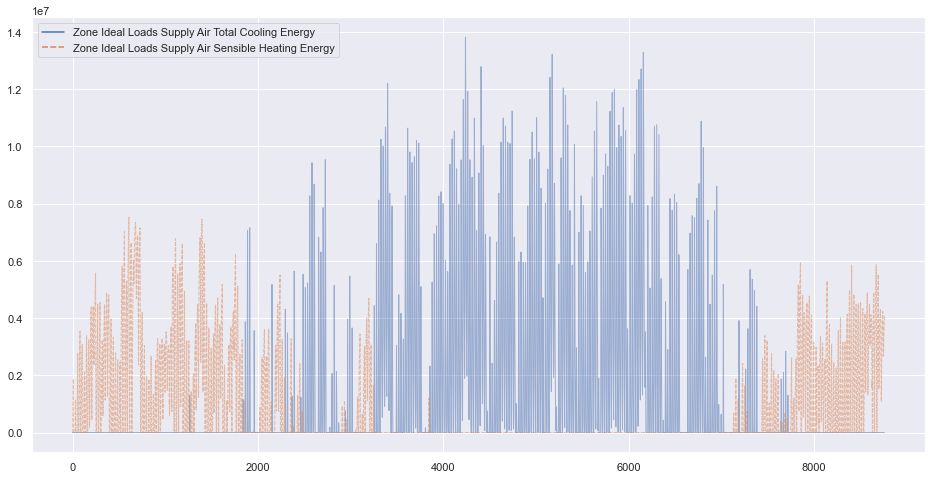

In [14]:
g = sns.lineplot(data=results[["Zone Ideal Loads Supply Air Total Cooling Energy",
                               "Zone Ideal Loads Supply Air Sensible Heating Energy"]], 
                 legend=True,
                 alpha=0.5,
                 linewidth=1)

sns.set(rc={"figure.figsize":(16, 8)})

# Creating zone Constructions and applying constructions to surfaces

EnergyPlus Zone constructions are IDF objects with layers as fields, and each layer has a material name that the software will call from the idf material objects. Thus, we need to isolate each material objects from our materials database IDF based on their type:

In [15]:
mats = materials.idfobjects["MATERIAL"] #Opaque materials
window_mats = materials.idfobjects["WINDOWMATERIAL:GLAZING"] #Window materials - Glazings
window_airgaps_mats = materials.idfobjects["WINDOWMATERIAL:GAS"] #Window materials - Airgaps
airgap_mats = materials.idfobjects["MATERIAL:AIRGAP"] #airgap materials for opaque constructions

In [16]:
full_mats = []
for i in [mats, window_mats, window_airgaps_mats, airgap_mats]:
    full_mats = np.append(full_mats, i)

In [17]:
full_mats

array([ Material,
           AirGap,                   !- Name
           Smooth,                   !- Roughness
           0.03,                     !- Thickness
           0.667,                    !- Conductivity
           1.28,                     !- Density
           1000,                     !- Specific Heat
           0.9,                      !- Thermal Absorptance
           0.7,                      !- Solar Absorptance
           0.7;                      !- Visible Absorptance,

       Material,
           F08 Metal surface,        !- Name
           Smooth,                   !- Roughness
           0.0008,                   !- Thickness
           45.28,                    !- Conductivity
           7824,                     !- Density
           500,                      !- Specific Heat
           0.9;                      !- Thermal Absorptance,

       Material,
           I01 25mm insulation board,    !- Name
           MediumRough,              !- Roughness
       

We see that the opaque Material Names have spaces. While energy plus works with this, EPPY and python don't like spaces in definitions! lets remove the spaces from the strings and copy the idf objects to our zone idf

In [18]:
for mat in full_mats:
    mat.Name = mat.Name.replace(" ", "")

In [19]:
for mat in full_mats:
    idf1.copyidfobject(mat)

Now that we have copied our materials library to our idf, lets analyse the constructions in our zone and choose the materials for the construction we are going to create and apply to a wall. Thus, a wall construction

In [20]:
construction = ["Reboco-2cm", "TijoloFurado_11", "XPS_4", "TijoloFurado_11", "Arg_Cimento_Clara_2.5", "Estuque_Claro_1.5"]

In [21]:
constructions = idf1.idfobjects["CONSTRUCTION"]

In [22]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

We see that each construction has a name, and fields for each layer, starting with our outside layer. Thus, we could add a construction like this:

In [23]:
idf1.newidfobject("CONSTRUCTION",
                  Name="New_wall_construction",
                  Outside_Layer = construction[0],
                  Layer_2 = construction[1],
                  Layer_3 = construction[2],
                  Layer_4 = construction[3],
                  Layer_5 = construction[4],
                  Layer_6 = construction[5])


CONSTRUCTION,
    New_wall_construction,    !- Name
    Reboco-2cm,               !- Outside Layer
    TijoloFurado_11,          !- Layer 2
    XPS_4,                    !- Layer 3
    TijoloFurado_11,          !- Layer 4
    Arg_Cimento_Clara_2.5,    !- Layer 5
    Estuque_Claro_1.5;        !- Layer 6

For all effects, EnergyPlus is a programming language, and it thas some flaws that we have to work through to implement certain solutions. In this case, a python array starts counting on index 0, and in E+ idf language, our Layer 0 field is called "Outside Layer", and our Layer 1 is called "Layer 2". This means that when the Layer index (i) is i = 0, we must specify the field name "Outside Layer" and when it is not zero,we must specify i = "Layer_" + str(i+1).

In [24]:
def layer_from_index(i):
    if i == 0:
        return "Outside_Layer"
    else:
        return "Layer_" + str(i+1)

Now that we have the function that defines the idf construction object field names, we want to attribute material names to each field so the IDF can retrieve them from our materials list. We can develop a little function that applies the function above to any construction and returns a python dictionary with the correct field names associated to the index order of our construction array.

In [25]:
list(enumerate(construction))

[(0, 'Reboco-2cm'),
 (1, 'TijoloFurado_11'),
 (2, 'XPS_4'),
 (3, 'TijoloFurado_11'),
 (4, 'Arg_Cimento_Clara_2.5'),
 (5, 'Estuque_Claro_1.5')]

In [26]:
def layers_dict(construction):
    return {layer_from_index(i):kind for i, kind in enumerate(construction)}

In [27]:
layers_dict(construction)

{'Outside_Layer': 'Reboco-2cm',
 'Layer_2': 'TijoloFurado_11',
 'Layer_3': 'XPS_4',
 'Layer_4': 'TijoloFurado_11',
 'Layer_5': 'Arg_Cimento_Clara_2.5',
 'Layer_6': 'Estuque_Claro_1.5'}

We can then unpack the dictionary keys as the newidfobject function arguments, and values as argument values.

In [28]:
idf1.newidfobject("CONSTRUCTION",
                  Name="New_wall_construction_0",
                  **layers_dict(construction))


CONSTRUCTION,
    New_wall_construction_0,    !- Name
    Reboco-2cm,               !- Outside Layer
    TijoloFurado_11,          !- Layer 2
    XPS_4,                    !- Layer 3
    TijoloFurado_11,          !- Layer 4
    Arg_Cimento_Clara_2.5,    !- Layer 5
    Estuque_Claro_1.5;        !- Layer 6

In [29]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

We have successfully added a construction object to our constructions library in the IDF File.

If we want to reset our idf to its original state either because we want to create new constructions or change some materials, we can repeat the steps of reading the idf with the respective fname, weather file,  read the materials idf library, replace the empty spaces among words in the materials library, and copy them to our zone idf.

In [32]:
idf1 = IDF(fname1, weather_file)
materials = IDF(fname2, weather_file)
mats = materials.idfobjects["MATERIAL"] #Opaque materials
window_mats = materials.idfobjects["WINDOWMATERIAL:GLAZING"] #Window materials - Glazings
window_airgaps_mats = materials.idfobjects["WINDOWMATERIAL:GAS"] #Window materials - Airgaps
airgap_mats = materials.idfobjects["MATERIAL:AIRGAP"] #airgap materials for opaque constructions

full_mats = []
for i in [mats, window_mats, window_airgaps_mats, airgap_mats]:
    full_mats = np.append(full_mats, i) #appends all mats to a flat array
    
for mat in full_mats:
    mat.Name = mat.Name.replace(" ", "") #replaces spaces
    
for mat in full_mats:
    idf1.copyidfobject(mat) #copy mats to building idf 
    


In [33]:
idf1.idfobjects["CONSTRUCTION"]

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

and here we have our original constructions and added materials from our materials library idf. But it is not done yet. Now we need to apply this construction to a specific building surface. To do this, we can start by creating again our construction, and by exploring the surfaces in our IDF file.

In [34]:
idf1.newidfobject("CONSTRUCTION",
                  Name="New_wall_construction",
                  **layers_dict(construction))


CONSTRUCTION,
    New_wall_construction,    !- Name
    Reboco-2cm,               !- Outside Layer
    TijoloFurado_11,          !- Layer 2
    XPS_4,                    !- Layer 3
    TijoloFurado_11,          !- Layer 4
    Arg_Cimento_Clara_2.5,    !- Layer 5
    Estuque_Claro_1.5;        !- Layer 6

In [35]:
constructions = idf1.idfobjects["CONSTRUCTION"]

In [36]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

In [37]:
opaque_surfaces = idf1.idfobjects["BuildingSurface:Detailed"]
window_surfaces = idf1.idfobjects["FenestrationSurface:Detailed"]

In [38]:
window_surfaces

[
FenestrationSurface:Detailed,
    169BE2,                   !- Name
    Window,                   !- Surface Type
    Exterior Window,          !- Construction Name
    DE6A22,                   !- Building Surface Name
    ,                         !- Outside Boundary Condition Object
    ,                         !- View Factor to Ground
    ,                         !- Frame and Divider Name
    ,                         !- Multiplier
    4,                        !- Number of Vertices
    6.623840899092,           !- Vertex 1 Xcoordinate
    0,                        !- Vertex 1 Ycoordinate
    3.083117929304,           !- Vertex 1 Zcoordinate
    6.623840899092,           !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    1.083117929304,           !- Vertex 2 Zcoordinate
    8.623840899092,           !- Vertex 3 Xcoordinate
    0,                        !- Vertex 3 Ycoordinate
    1.083117929304,           !- Vertex 3 Zcoordinate
    8.623840899092

In [39]:
opaque_surfaces

[
BuildingSurface:Detailed,
    685B03,                   !- Name
    Floor,                    !- Surface Type
    Exterior Floor,           !- Construction Name
    9467A6,                   !- Zone Name
    Ground,                   !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    ,                         !- View Factor to Ground
    4,                        !- Number of Vertices
    10,                       !- Vertex 1 Xcoordinate
    10,                       !- Vertex 1 Ycoordinate
    0,                        !- Vertex 1 Zcoordinate
    10,                       !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    0,                        !- Vertex 3 Xcoordinate
    0,                        !- Vertex 3 Ycoordinate
    0,                        !- Ve

Since we defined an exterior wall construction, we need to attribute the specific construction name to our exterior walls. From observing the objects in our surfaces, we see that there are two fields that can help us filter the exterior walls. An exterior wall as a boundary condition of "Outdoors", and a "Surface Type" of "Wall.

In [40]:
for opaque_surface in opaque_surfaces:
    if opaque_surface["Outside_Boundary_Condition"] == "Outdoors" and opaque_surface["Surface_Type"] == "Wall":
        opaque_surface["Construction_Name"] = constructions[-1]["Name"] #we retrieve the name of the last item in constructions since we added it last, we could also write the construction name that we defined as a string

In [41]:
opaque_surfaces

[
BuildingSurface:Detailed,
    685B03,                   !- Name
    Floor,                    !- Surface Type
    Exterior Floor,           !- Construction Name
    9467A6,                   !- Zone Name
    Ground,                   !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    ,                         !- View Factor to Ground
    4,                        !- Number of Vertices
    10,                       !- Vertex 1 Xcoordinate
    10,                       !- Vertex 1 Ycoordinate
    0,                        !- Vertex 1 Zcoordinate
    10,                       !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    0,                        !- Vertex 3 Xcoordinate
    0,                        !- Vertex 3 Ycoordinate
    0,                        !- Ve

And we successfully changed our exterior walls construction to our defined construction. we can now rerun the idf and obtain the energy simulation results for our building with the new construction on exterior walls

# Hands-on exercise - finding the best construction solutions for each surface.

Imagining that we are planning build our created zone. We want to find the best possible combination of constructions on each surface type that yields the least energy consumption, with the least possible cost. However, if we have $3$ possible constructions for each exterior wall element, each floor element, and each window element we might have hundreds, if not thousands or millions of possible combinations. In this case, since we have $4$ exterior walls, $1$ floor, and $2$ windows, we have $3^7$ possible combinations which represents $2187$ possible solutions. if each simulation takes approximately 10 seconds, we would take around 6 hours to simulate all the possible combinations. Luckily, we can solve this optimization problem in less time with EPPY and python even for larger and more complex problems than this one. Let's start by resetting our idf file to the original, concatenating our materials library, and copying it to our building IDF.

In [42]:
idf1 = IDF(fname1, weather_file)
materials = IDF(fname2, weather_file)
mats = materials.idfobjects["MATERIAL"] #Opaque materials
window_mats = materials.idfobjects["WINDOWMATERIAL:GLAZING"] #Window materials - Glazings
window_airgaps_mats = materials.idfobjects["WINDOWMATERIAL:GAS"] #Window materials - Airgaps
airgap_mats = materials.idfobjects["MATERIAL:AIRGAP"] #airgap materials for opaque constructions
constructions = idf1.idfobjects["CONSTRUCTION"]
full_mats = []
for i in [mats, window_mats, window_airgaps_mats, airgap_mats]:
    full_mats = np.append(full_mats, i) #appends all mats to a flat array
    
for mat in full_mats:
    mat.Name = mat.Name.replace(" ", "") #replaces spaces
    
for mat in full_mats:
    idf1.copyidfobject(mat) #copy mats to building idf 

Then we define the possible construction for each element type - walls, floors, and windows, and their respective cost/m2

In [43]:
Wmaterials = [["Reboco-2cm", "TijoloFurado_15", "AirGap", "TijoloFurado_11", "Estuque_Claro_1.5"],
              ["Reboco-2cm", "TijoloFurado_11", "AirGap", "TijoloFurado_11", "Estuque_Claro_1.5"],
              ["Reboco-2cm", "TijoloFurado_15", "AirGap", "IsolamentoXPS-4cm", "TijoloFurado_11", "Estuque_Claro_1.5"]]

wall_costs = [25, 20, 45]

Fmaterials = [["PaineisdeMadeira_12", "Estuque_Claro_1.5"],
              ["Ceramicavidrada-1cm", "BetonilhadeAcentamento_8", "LajeBetao_15", "Estuque_Claro_1.5"],
              ["Ceramicavidrada-1cm", "BetonilhadeAcentamento_8", "LajeAligeirada_0.25", "Estuque_Claro_1.5"]]

floors_costs = [10, 25, 30]

Wndmaterials = [[2.69, 0.75, 0.8], [1.70, 0.38, 0.7], [1.25, 0.2, 0.7]]

wnd_costs = [50, 80, 100]


lets start by inserting these constructions in the new idf. We can start by setting new glazing system materials for each window since we haven't done it yet, and then define our constructions according to the selected materials

In [44]:
for mat in enumerate(Wndmaterials):
    idf1.newidfobject("WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM",
                           Name='window_' + str(mat[0]),
                           UFactor = float(mat[1][0]),
                           Solar_Heat_Gain_Coefficient= float(mat[1][1]),
                           Visible_Transmittance = float(mat[1][2]))

In [45]:
window_mats = idf1.idfobjects["WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM"]

In [46]:
window_mats

[
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_0,                 !- Name
    2.69,                     !- UFactor
    0.75,                     !- Solar Heat Gain Coefficient
    0.8;                      !- Visible Transmittance
, 
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_1,                 !- Name
    1.7,                      !- UFactor
    0.38,                     !- Solar Heat Gain Coefficient
    0.7;                      !- Visible Transmittance
, 
WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM,
    window_2,                 !- Name
    1.25,                     !- UFactor
    0.2,                      !- Solar Heat Gain Coefficient
    0.7;                      !- Visible Transmittance
]

In [47]:
for window_mat in enumerate(window_mats):
        idf1.newidfobject("CONSTRUCTION",
                          Name = window_mat[1].Name,
                          Outside_Layer = window_mat[1].Name)

In [48]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

The window constructions are set in the idf, now we can move on to the walls.

In [49]:
for construction in enumerate(Wmaterials):
     idf1.newidfobject("CONSTRUCTION",
                       Name='EXT_WALL' + str(construction[0]),
                       **layers_dict(construction[1]))

In [50]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

Now we do the same for the floor materials

In [51]:
for construction in enumerate(Fmaterials):
    idf1.newidfobject("CONSTRUCTION",
                      Name='floor_' + str(construction[0]),
                      **layers_dict(construction[1]))

In [52]:
constructions

[
Construction,
    Exterior Floor,           !- Name
    I02 50mm insulation board,    !- Outside Layer
    M15 200mm heavyweight concrete;    !- Layer 2
, 
Construction,
    Interior Floor,           !- Name
    F16 Acoustic tile,        !- Outside Layer
    F05 Ceiling air space resistance,    !- Layer 2
    M11 100mm lightweight concrete;    !- Layer 3
, 
Construction,
    Exterior Wall,            !- Name
    M01 100mm brick,          !- Outside Layer
    M15 200mm heavyweight concrete,    !- Layer 2
    I02 50mm insulation board,    !- Layer 3
    F04 Wall air space resistance,    !- Layer 4
    G01a 19mm gypsum board;    !- Layer 5
, 
Construction,
    Interior Wall,            !- Name
    G01a 19mm gypsum board,    !- Outside Layer
    F04 Wall air space resistance,    !- Layer 2
    G01a 19mm gypsum board;    !- Layer 3
, 
Construction,
    Exterior Roof,            !- Name
    M11 100mm lightweight concrete,    !- Outside Layer
    F05 Ceiling air space resistance,    !- Laye

Now that we have our constructions all set up, we can start elaborating the optimization function. We want an Energy function, that runs an idf with a specific combination of constructions, one for each surface. Thus, our variables are each surface construction. We want to optimize the exterior walls, floors, and windows. So our variables are the number of exterior wall surfaces, plus the number of floor surfaces, plus the number of window surfaces. Let's isolate the surface elements we want to iterate constructions on.

In [53]:
opaque_surfaces = idf1.idfobjects["BuildingSurface:Detailed"]
window_surfaces = idf1.idfobjects["FenestrationSurface:Detailed"]

In [54]:
window_surfaces

[
FenestrationSurface:Detailed,
    169BE2,                   !- Name
    Window,                   !- Surface Type
    Exterior Window,          !- Construction Name
    DE6A22,                   !- Building Surface Name
    ,                         !- Outside Boundary Condition Object
    ,                         !- View Factor to Ground
    ,                         !- Frame and Divider Name
    ,                         !- Multiplier
    4,                        !- Number of Vertices
    6.623840899092,           !- Vertex 1 Xcoordinate
    0,                        !- Vertex 1 Ycoordinate
    3.083117929304,           !- Vertex 1 Zcoordinate
    6.623840899092,           !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    1.083117929304,           !- Vertex 2 Zcoordinate
    8.623840899092,           !- Vertex 3 Xcoordinate
    0,                        !- Vertex 3 Ycoordinate
    1.083117929304,           !- Vertex 3 Zcoordinate
    8.623840899092

To isolate window surfaces we just need to gather all the idf objects in "FenestrationSurface:Detailed". However, to find walls and floors we need to search for them through all the opaque surfaces.

In [55]:
opaque_surfaces

[
BuildingSurface:Detailed,
    685B03,                   !- Name
    Floor,                    !- Surface Type
    Exterior Floor,           !- Construction Name
    9467A6,                   !- Zone Name
    Ground,                   !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    NoSun,                    !- Sun Exposure
    NoWind,                   !- Wind Exposure
    ,                         !- View Factor to Ground
    4,                        !- Number of Vertices
    10,                       !- Vertex 1 Xcoordinate
    10,                       !- Vertex 1 Ycoordinate
    0,                        !- Vertex 1 Zcoordinate
    10,                       !- Vertex 2 Xcoordinate
    0,                        !- Vertex 2 Ycoordinate
    0,                        !- Vertex 2 Zcoordinate
    0,                        !- Vertex 3 Xcoordinate
    0,                        !- Vertex 3 Ycoordinate
    0,                        !- Ve

To search for the wall surfaces, we need to test all surfaces for their surface type (wall) and boundary condition(outdoors), if we only searched for walls, we could include interior walls if they existed.

In [56]:
wall_surfaces = []
for opaque_surface in opaque_surfaces:
    if opaque_surface["Surface_Type"] == "Wall" and opaque_surface["Outside_Boundary_Condition"] == "Outdoors":
        wall_surfaces = np.append(wall_surfaces, opaque_surface)

In [57]:
wall_surfaces

array([ BuildingSurface:Detailed,
           6F11CD,                   !- Name
           Wall,                     !- Surface Type
           Exterior Wall,            !- Construction Name
           9467A6,                   !- Zone Name
           Outdoors,                 !- Outside Boundary Condition
           ,                         !- Outside Boundary Condition Object
           SunExposed,               !- Sun Exposure
           WindExposed,              !- Wind Exposure
           ,                         !- View Factor to Ground
           4,                        !- Number of Vertices
           10,                       !- Vertex 1 Xcoordinate
           0,                        !- Vertex 1 Ycoordinate
           4,                        !- Vertex 1 Zcoordinate
           10,                       !- Vertex 2 Xcoordinate
           0,                        !- Vertex 2 Ycoordinate
           0,                        !- Vertex 2 Zcoordinate
           10,           

Now we do the same for the floors, but we just need to search through each surface type and not boundary conditions. If there was more than one floor, we would have to create an array for floor_surfaces and other array for ground floor surface, using boundary conditions as above.

In [58]:
floor_surfaces = []
for opaque_surface in opaque_surfaces:
    if opaque_surface["Surface_Type"] == "Floor":
        floor_surfaces = np.append(floor_surfaces, opaque_surface)

In [59]:
floor_surfaces

array([ BuildingSurface:Detailed,
           685B03,                   !- Name
           Floor,                    !- Surface Type
           Exterior Floor,           !- Construction Name
           9467A6,                   !- Zone Name
           Ground,                   !- Outside Boundary Condition
           ,                         !- Outside Boundary Condition Object
           NoSun,                    !- Sun Exposure
           NoWind,                   !- Wind Exposure
           ,                         !- View Factor to Ground
           4,                        !- Number of Vertices
           10,                       !- Vertex 1 Xcoordinate
           10,                       !- Vertex 1 Ycoordinate
           0,                        !- Vertex 1 Zcoordinate
           10,                       !- Vertex 2 Xcoordinate
           0,                        !- Vertex 2 Ycoordinate
           0,                        !- Vertex 2 Zcoordinate
           0,            

Now that we have isolated our surface variables, we need to write a function that receives a set with the length of the total number of surfaces that are variables with construction solutions to test for each surface, and returns the heating, cooling, and cost. Additionally, the energy output from the IDF comes in J, which is a hard number to read. However we can create a function that converts J to kWh/m2 based on the floor area of our building.

In [60]:
def convert_to_kwh_m2(joules, area):
    return joules/(3600 * 1000 * area)

# Optimization function

In [61]:
import time

def opt_output(xs):
    startTime = time.time() #start counting computing time
    column_names = []
    cost = []
    
    # Defining constructions based on input variables
    
    for i in range(len(wall_surfaces)):
        column_names = np.append(column_names, wall_surfaces[i]["Name"])
        wall_surfaces[i]["Construction_Name"] = "EXT_WALL" + str(xs[i])
        cost = np.append(cost, wall_surfaces[i].area * wall_costs[xs[i]])
        
    for i in range(len(floor_surfaces)):             
        column_names = np.append(column_names, floor_surfaces[i]["Name"])
        floor_surfaces[i]["Construction_Name"] = "floor_" + str(xs[i + len(wall_surfaces)])
        cost = np.append(cost, floor_surfaces[i].area * floors_costs[xs[i + len(wall_surfaces)]])
        
    for i in range(len(window_surfaces)):
        column_names = np.append(column_names, window_surfaces[i]["Name"])
        window_surfaces[i]["Construction_Name"] = "window_" + str(xs[i + len(wall_surfaces) + len(floor_surfaces)]) 
        cost = np.append(cost, window_surfaces[i].area * wnd_costs[xs[i+ len(wall_surfaces) + len(floor_surfaces)]])
    
    #Running the IDF and obtain inputs
    
    idf1.run() #run new idf
    eso = esoreader.read_from_path(r"C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\eplusout.eso")#Read result file
    data = pd.DataFrame(eso.data) #convert dict to dataframe
    data.columns = [eso.dd.variables[i][2] for i in data.columns]#set the column names from dict
    heating = convert_to_kwh_m2(data["Zone Ideal Loads Supply Air Sensible Heating Energy"].sum(), floor_surfaces[0].area) #Retrieve hourly heating energy
    cooling = convert_to_kwh_m2(data["Zone Ideal Loads Supply Air Total Cooling Energy"].sum(), floor_surfaces[0].area)  #Retrieve hourly cooling energy
    executionTime = time.time() - startTime #finish counting computing time
    df = pd.DataFrame(np.hstack([executionTime, xs, heating, cooling, np.sum(cost)])).T
    df.columns = np.hstack(("executionTime", column_names, "heating", "cooling", "cost"))
    df.to_csv(fname, mode='a', index=False, header=False) #write_to_file
    return [heating + cooling, np.sum(cost)]
    #return df

In [62]:
import datetime
def time_str():
    now = datetime.datetime.now()
    now_str = str(now.year) + "_" + str(now.month) + "_" + str(now.day) + "_" + str(now.hour) + "_" + str(now.minute)
    return now_str

In [63]:
xs_test = [2, 2, 2, 2, 2, 2, 2]

In [64]:
fname = "test" + time_str() + '.csv'
opt_output(xs_test)


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf



[44.47010286795286, 11000.0]

In [65]:
wall_costs

[25, 20, 45]

In [66]:
wall_surfaces[1].area

40.0

In [67]:
floors_costs

[10, 25, 30]

In [68]:
floor_surfaces[0].area

100.0

In [69]:
wnd_costs

[50, 80, 100]

In [70]:
window_surfaces[0].area

4.000000000000002

In [71]:
! pip install Platypus-Opt

In [72]:
from platypus import NSGAII, SPEA2, IBEA, Problem, Integer

nvars = len(wall_surfaces) + len(floor_surfaces) + len(window_surfaces)

problem_types = []
for i in range(nvars):
    problem_types = np.append(problem_types, Integer(0, 2))

In [73]:
problem_types

array([<platypus.types.Integer object at 0x00000238993D7AC0>,
      dtype=object)

In [83]:
n_evals = 300
problem = Problem(nvars, 2)
problem.types[:] = problem_types
problem.function = opt_output

fname = "NSGA_Lisbon" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = NSGAII(problem,
                       population_size= 40,
                        )
    algorithm.run(n_evals)


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx

In [84]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]


df_NSGAII = pd.DataFrame([x, y]).transpose()
df_NSGAII.columns = ["heating & cooling", "total cost €"]

In [85]:
problem = Problem(nvars, 2)
problem.types[:] = problem_types
problem.function = opt_output

fname = "SPEA2_Lisbon" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = SPEA2(problem,
                      population_size= 40)
    algorithm.run(n_evals)


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx

In [86]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]

df_SPEA2 = pd.DataFrame([x, y]).transpose()
df_SPEA2.columns = ["heating & cooling", "total cost €"]

In [ ]:
problem = Problem(nvars, 2)
problem.types[:] = problem_types
problem.function = opt_output

fname = "IBEA_Lisbon" + time_str() + '.csv'

with open(fname, 'a') as my_new_csv_file:
    algorithm = IBEA(problem,
                     population_size= 40)
    algorithm.run(n_evals)


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx.2004-2018.epw --output-directory C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class --idd C:\EnergyPlusV9-5-0\Energy+.idd --expandobjects C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\EPPY_Class\in.idf


C:\EnergyPlusV9-5-0\energyplus.exe --weather C:\Users\GRA\OneDrive - Universidade de Lisboa\Desktop\IN+\C-Tech\EPPY\LISBOA\PRT_LB_Lisboa.Portela.AP.085360_TMYx

In [ ]:
x = [s.objectives[0] for s in algorithm.result]
y = [s.objectives[1] for s in algorithm.result]

df_IBEA = pd.DataFrame([x, y]).transpose()
df_IBEA.columns = ["heating & cooling", "total cost €"]

In [ ]:
! pip install plotly

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
dfs = {"IBEA" : df_IBEA, "SPEA2": df_SPEA2, "NSGAII" : df_NSGAII}

for i in dfs:
    fig = fig.add_trace(go.Scatter(#data_frame = dfs[i],
                                    x = dfs[i]["heating & cooling"],
                                    y = dfs[i]["total cost €"],
                                    name = i,
                                    opacity = 0.7,
                                    #line = None,
                                    mode = "markers",
                                    marker = dict(size = 0),
                                    #alphahull =0,
                                    showlegend= True))
    
fig.show()

This work was supported by international funds through Fundo Europeu de Desenvolvimento Regional (FEDER) with reference <i> POCI-01-0247-FEDER-045919 </i>, national funds through PhD grant under contract of FCT with reference <i>2021.04849.BD.</i><p>
If you use this notebook for research purposes please cite: <p>
<i>G. Araujo, L. Santos, A. Leitão, and R. Gomes, “Ad-based surrogate models for simulation and optimization of large urban areas,” in 27th International Conference of the Association for Computer-Aided Architectural Design Research in Asia (CAADRIA 2022)